In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime as dt
from datetime import date

In [7]:
# Task 1 - extract the information about Justin Trudeau since 01.01.2018

url = 'https://content.guardianapis.com/search'
search_term = 'Justin Trudeau'
date_today = date.today().strftime("%Y-%m-%d")

params = {'api-key':'8eb7b724-c4d4-42f0-845a-0617f9495526',
            'page-size':50, #Page Size 100 or 200 caused an error.
            'q':search_term,
            'from-date': "2018-01-01",
            'to-date': date_today,
            'page': 1
        }

def query_api(url, params):
    """
    Function to query the Guardian API with the preffered search term. 
    The output is a int with the amount of results and a string with the actual date and the amount of results to verify.
    """
    response = requests.get(url, params)
    return response.json()

json_result = query_api(url, params)
print('On the ' + date_today + ', we found ' + str(json_result['response']['total']) + ' results with the search term ' + search_term +'.')

def query_all_articles(url, params):
    """
    Function to iterate trough all the results/pages from the query and add the results to one dataframe.
    The function adds at the params dict "page" in every iteration +1, to go trough every page automated. 
    """
    df = pd.DataFrame(columns=['id', 'type', 'sectionId', 'sectionName', 'webPublicationDate', 'webTitle', 'webUrl', 'apiUrl','fields','isHosted','pillarId','pillarName'])

    if int(json_result['response']['total']) > 200:
        for i in range(0, (int((json_result['response']['total']) / int(params['page-size']) + 1))):
            print('Iterate through page number ' + str(params['page'])) #To check the iterations
            data = pd.DataFrame(query_api(url, params)['response']['results'])
            df = pd.concat([df, data])
            params['page'] = int(params['page']) + 1
            time.sleep(3)
                

    return df

df_guardian = query_all_articles(url, params)



On the 2023-01-09, we found 8213 results with the search term Justin Trudeau.
Iterate through page number 1
Iterate through page number 2
Iterate through page number 3
Iterate through page number 4
Iterate through page number 5
Iterate through page number 6
Iterate through page number 7
Iterate through page number 8
Iterate through page number 9
Iterate through page number 10
Iterate through page number 11
Iterate through page number 12
Iterate through page number 13
Iterate through page number 14
Iterate through page number 15
Iterate through page number 16
Iterate through page number 17
Iterate through page number 18
Iterate through page number 19
Iterate through page number 20
Iterate through page number 21
Iterate through page number 22
Iterate through page number 23
Iterate through page number 24
Iterate through page number 25
Iterate through page number 26
Iterate through page number 27
Iterate through page number 28
Iterate through page number 29
Iterate through page number 30
I

,index,webPublicationDate,id,type,sectionId,sectionName,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,0,2022-12-08,world/2022/dec/08/sovereignty-act-passed-alber...,article,world,World news,Alberta ‘sovereignty act’ sets province on col...,https://www.theguardian.com/world/2022/dec/08/...,https://content.guardianapis.com/world/2022/de...,NaN,False,pillar/news,News
1,1,2022-11-02,tv-and-radio/2022/nov/02/drugs-impotence-and-p...,article,tv-and-radio,Television & radio,"Drugs, impotence and punching Justin Trudeau: ...",https://www.theguardian.com/tv-and-radio/2022/...,https://content.guardianapis.com/tv-and-radio/...,NaN,False,pillar/arts,Arts
2,2,2022-09-08,world/2022/sep/08/canada-queen-elizabeth-death...,article,world,World news,"‘Canada is in mourning,’ says Justin Trudeau a...",https://www.theguardian.com/world/2022/sep/08/...,https://content.guardianapis.com/world/2022/se...,NaN,False,pillar/news,News
3,3,2022-11-03,world/2022/nov/03/ontario-doug-ford-strike-fin...,article,world,World news,"Canadian bill would fine workers $4,000 for ea...",https://www.theguardian.com/world/2022/nov/03/...,https://content.guardianapis.com/world/2022/no...,NaN,False,pillar/news,News
4,4,2022-03-22,world/2022/mar/22/justin-trudeau-power-sharing...,article,world,World news,Justin Trudeau strikes power-sharing deal with...,https://www.theguardian.com/world/2022/mar/22/...,https://content.guardianapis.com/world/2022/ma...,NaN,False,pillar/news,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948,7948,2018-08-16,australia-news/live/2018/aug/16/energy-dissent...,liveblog,australia-news,Australia news,"Hanson says Anning speech went too far, but wa...",https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,NaN,False,pillar/news,News
7949,7949,2019-09-21,environment/live/2019/sep/20/climate-strike-gl...,liveblog,environment,Environment,Global climate strike: Greta Thunberg and scho...,https://www.theguardian.com/environment/live/2...,https://content.guardianapis.com/environment/l...,NaN,False,pillar/news,News
7950,7950,2018-03-30,sport/live/2018/mar/30/south-africa-v-australi...,liveblog,sport,Sport,"South Africa v Australia: fourth Test, day one...",https://www.theguardian.com/sport/live/2018/ma...,https://content.guardianapis.com/sport/live/20...,NaN,False,pillar/sport,Sport
7951,7951,2018-01-31,us-news/live/2018/jan/30/state-of-the-union-ad...,liveblog,us-news,US news,Trump sets out immigration plan in State of th...,https://www.theguardian.com/us-news/live/2018/...,https://content.guardianapis.com/us-news/live/...,NaN,False,pillar/news,News


In [8]:
# Check & clean the data
df_guardian.info() 

# 8212 rows, 12 columns
df_guardian.shape

# All datatypes are objects --> I wil lchange the 'webPublicationDate" to datetime format and set as index for a easier data handling
df_guardian.dtypes

df_guardian['webPublicationDate'] = pd.to_datetime(df_guardian['webPublicationDate']).dt.strftime("%Y-%m-%d")
df_guardian = df_guardian.set_index('webPublicationDate')

# I have found 20 row duplicates --> I will delete it
df_guardian[df_guardian.duplicated()].count()
df_guardian.drop_duplicates(inplace = True)

# I have found 55 duplicates with the same webTitle --> I will delete it, beacuse the most of them are "Correction and clarification" or Football preview articles
dup_webtitle = df_guardian.loc[:, 'webTitle'][df_guardian.loc[:, 'webTitle'].duplicated()]
df_guardian.drop_duplicates(subset=['webTitle'], inplace = True)

# I have found 8265 NaN Values in the column "field" --> I don't need this column, I will delete it
df_guardian.isna().sum()

# I have found 8265 Null Values in the column "field" --> I don't need this column, I will delete it
df_guardian.isnull().sum()

# For the tasks, I need just the columns type, sectionID, sectionName, webPucblication, webTitle
df_cleaned = df_guardian.loc[:, ['type', 'sectionId', 'sectionName', 'webTitle']]

df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8213 entries, 0 to 12
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  8213 non-null   object
 1   type                8213 non-null   object
 2   sectionId           8213 non-null   object
 3   sectionName         8213 non-null   object
 4   webPublicationDate  8213 non-null   object
 5   webTitle            8213 non-null   object
 6   webUrl              8213 non-null   object
 7   apiUrl              8213 non-null   object
 8   fields              0 non-null      object
 9   isHosted            8213 non-null   object
 10  pillarId            8188 non-null   object
 11  pillarName          8188 non-null   object
dtypes: object(12)
memory usage: 834.1+ KB


,type,sectionId,sectionName,webTitle
count,7896,7896,7896,7896
unique,3,44,44,7896
top,article,world,World news,Alberta ‘sovereignty act’ sets province on col...
freq,6436,1323,1323,1


In [9]:
# TASK 2 - Count how many articles about Justin Trudeau have been posted since 01.01.2018 until today (The data is already in this date range), grouped by Date and "No. of articles".

# Check how many of the types are articles
pd.crosstab(index = df_cleaned.loc[:, 'type'],
           columns = 'count')

# Set mask for type "article"
mask_article = df_cleaned.iloc[:, 0] == 'article' 

# Define df with the type 'article' and the date between 01.01.2018 - today
df_article = df_cleaned.loc[mask_article, :]


# RESULT

# Create table with "Date" and "No. of articles"
df_date = pd.crosstab(df_article.index, columns = 'No. of article', rownames=[''], colnames=['Date'])
df_date

Date,No. of article
,
2018-01-01,2
2018-01-02,3
2018-01-03,5
2018-01-04,1
2018-01-05,2
...,...
2023-01-01,1
2023-01-02,3
2023-01-03,1


In [10]:
# TASK 3 - Calculate the average no of articles for all days for the above mentiod periods from "No. of articles"

# RESULT

# Total daily average since 01.01.2018 until today (Solution: 4 Articles per day, rounded)
df_date.mean().round(0)

Date
No. of article    4.0
dtype: float64

In [11]:
# TASK 4 - In which section (I choose 'sectionName') are the most articles written

# RESULT

# Define Dataframe with the sections
df_section = pd.crosstab(index = df_article.iloc[:, 2],
                columns = 'No. of article', 
                colnames = ['Section'], 
                rownames = ['']
)

# Show sections sorted by No. of articles (Solution: The "World news" section has the most articles with 1010)
df_section.sort_values(by = ['No. of article'], ascending = False).iloc[0, :]

Section
No. of article    1005
Name: World news, dtype: int64

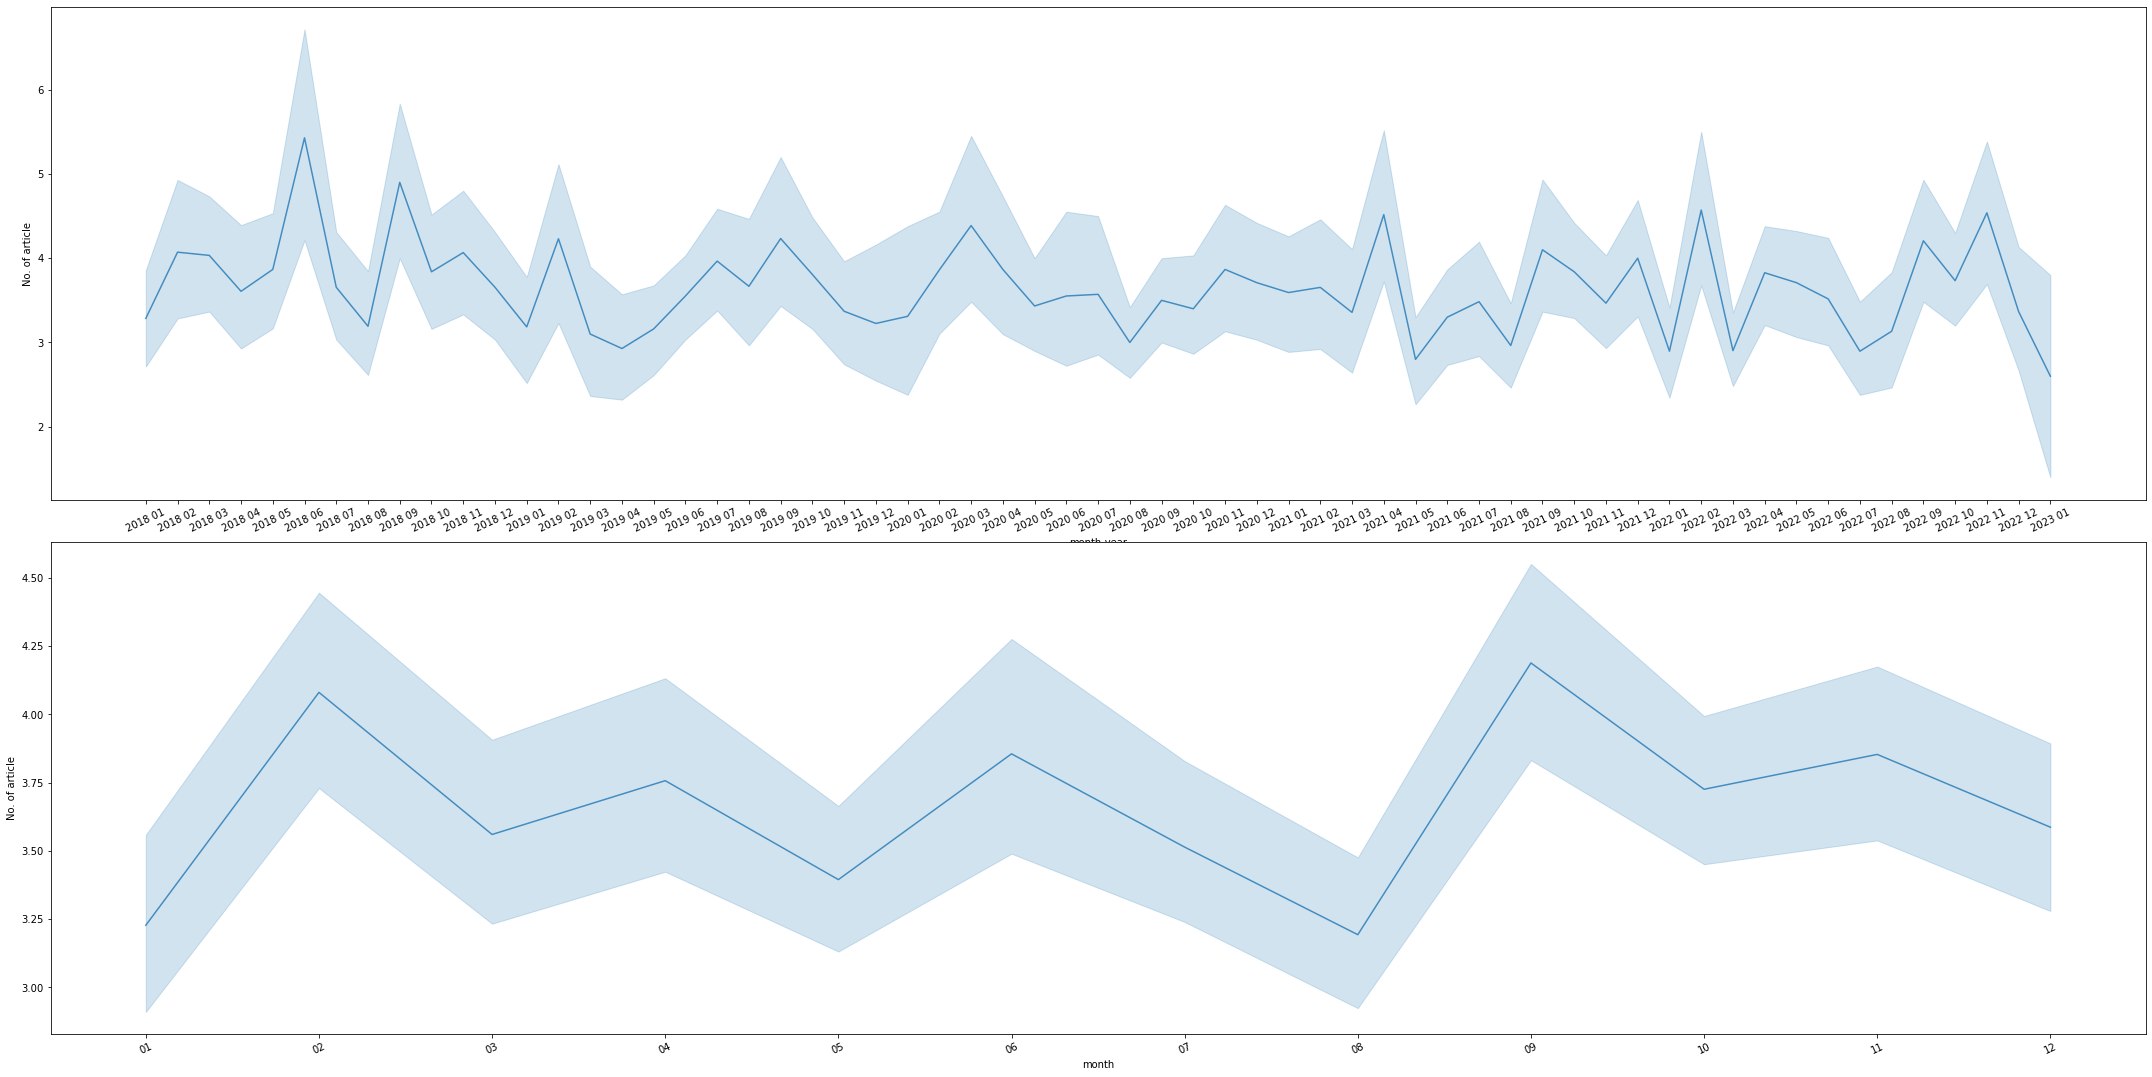

In [12]:
# TASK 5 - Show the evolution of the 'No. of articles? since 01.01.2018 until today
import seaborn as sns
%matplotlib inline

# Had to change the index and add some date columns for a easier handling
df_plot = df_date.reset_index()
df_plot = df_plot.rename_axis(None, axis=1)
df_plot['day'] = pd.to_datetime(df_plot['']).dt.to_period('D').dt.strftime('%d')
df_plot['month-year'] = pd.to_datetime(df_plot['']).dt.to_period('M').dt.strftime('%Y %m')
df_plot['month'] = pd.to_datetime(df_plot['']).dt.to_period('M').dt.strftime('%m')
df_plot['year'] = pd.to_datetime(df_plot['']).dt.to_period('Y').dt.strftime('%Y')

# Plot the data
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (30, 15))
sns.lineplot(x='month-year', y='No. of article', data=df_plot, ax=ax[0], alpha=0.8)
sns.lineplot(x='month', y='No. of article', data=df_plot, ax=ax[1], alpha=0.8)

# Style
plt.tight_layout()
ax[0].xaxis.set_tick_params(labelrotation=25)
ax[1].xaxis.set_tick_params(labelrotation=25)


In [ ]:
# TASK 6 - Are there any unusual events in the time series under investigation?

# Yes, I can see in the visualisation a higher amount of articles around 06/09 2018 and in general, there are more articles in February and September, then in the other months. 

Text(6.8, 135, '')

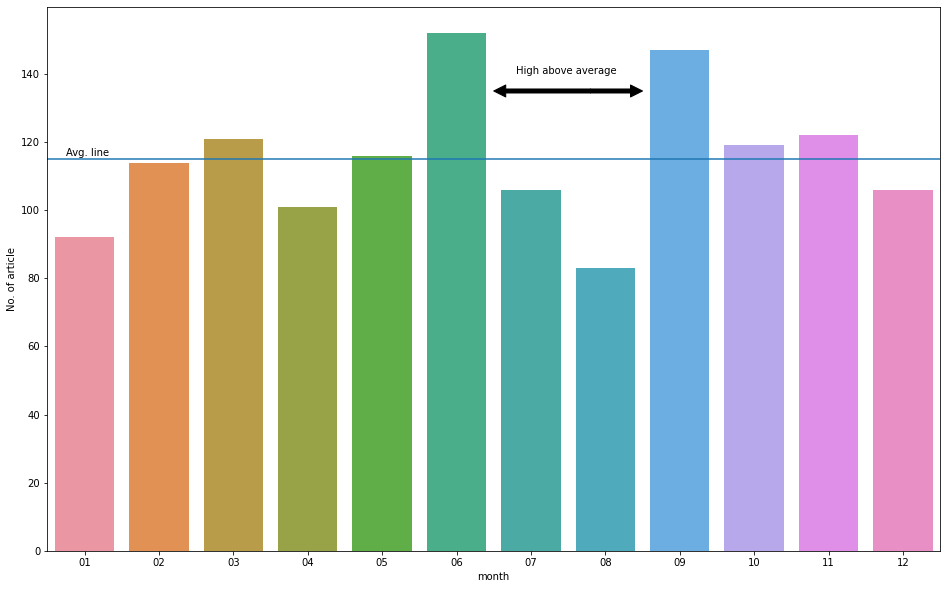

In [15]:
# TASK 7 - Show the unusual events

# I will concentrate me of the higher year 2018 and show the months, which are higher in average than the rest.

# Define a mask for 2018
mask_2018 = df_plot.loc[:, 'year'] == '2018'
df_plot_2018 = df_plot.loc[mask_2018, :]

# Create barchart for monthly visualisation
fig, ax1 = plt.subplots(figsize = (16, 10))
graph = sns.barplot( data = df_plot_2018, x = 'month', y = 'No. of article', ci = None, estimator = sum)

# Calculate the yearly average
mean_month = df_plot_2018.groupby('month')['No. of article'].sum().mean()

# Insert line with yearly average
graph = graph.axhline(mean_month)

# Insert text marker for high values and average
ax1.text(x = 5.8, y=140, s='High above average')
ax1.text(x = -0.25, y=116, s='Avg. line')

# Insert arrows for high values
ax1.annotate(text = '',
xy=[7.5, 135],
xytext=[6.8, 135],
arrowprops=dict(facecolor='black'))

ax1.annotate(text = '',
xy=[5.5, 135],
xytext=[6.8, 135],
arrowprops=dict(facecolor='black'))



<AxesSubplot:xlabel='webPublicationDate'>

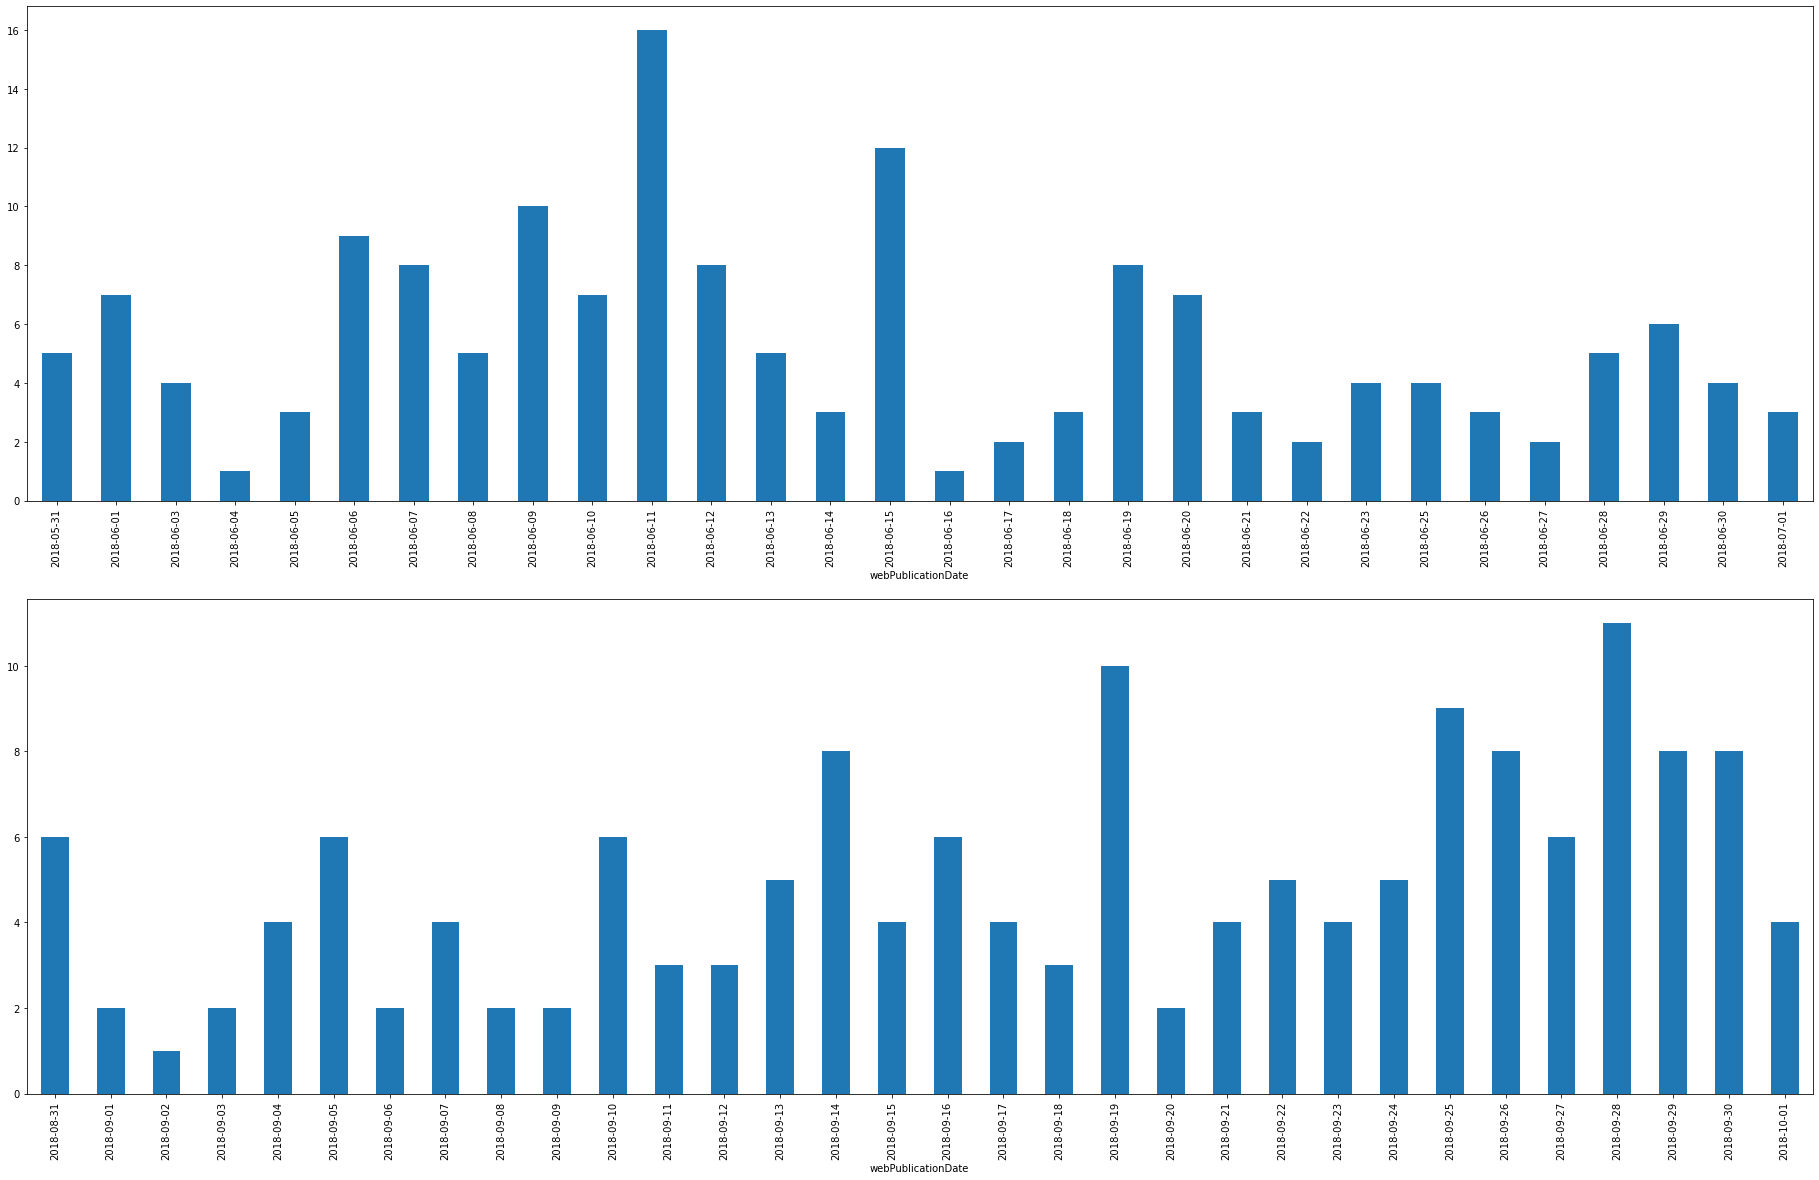

In [16]:
# TASK 8 - Show the root cause of the unusual events in 2018 

df_extract = df_article.reset_index()
df_extract['webPublicationDate'] = pd.to_datetime(df_extract['webPublicationDate']).dt.strftime("%Y-%m-%d")

# Extract the articles from the two months high above average June
df_extract_june = df_extract[df_extract['webPublicationDate'].between('2018-05-31', '2018-07-01')]

# Extract the articles from the two months high above average Sept
df_extract_sept = df_extract[df_extract['webPublicationDate'].between('2018-08-31', '2018-10-01')]

# Create Plot
fig, ax2 = plt.subplots(nrows = 2, ncols = 1, figsize = (32,20))
df_extract_june.groupby('webPublicationDate')['webTitle'].count().plot(kind = 'bar', ax = ax2[0])
df_extract_sept.groupby('webPublicationDate')['webTitle'].count().plot(kind = 'bar', ax = ax2[1])



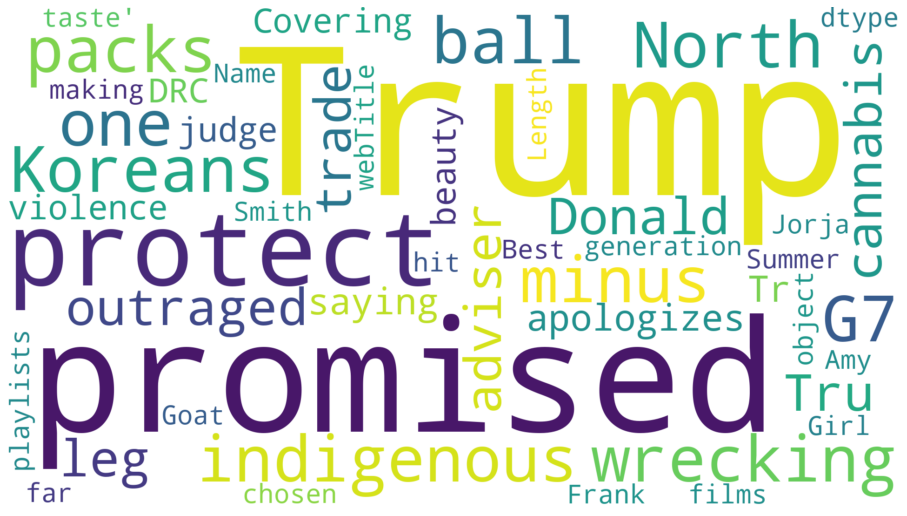

In [47]:
from wordcloud import WordCloud, STOPWORDS

# Define text for june
mask_title_june = df_extract_june.loc[:, 'webTitle'] 
text_june = str(df_extract_june.loc[:, 'webTitle'])

# Define text for sept
mask_title_sept = df_extract_sept.loc[:, 'webTitle'] 
text_sept = str(df_extract_sept.loc[:, 'webTitle'])

# Define unimportant words
words_stop = "to the of in a on ABC is and will justin trudeau for I Canada says fo - The after with like become Canadian"
words_stop_list = words_stop.split()
STOPWORDS.update(words_stop_list)

# Generate a word cloud image
wordcloud_june = WordCloud(background_color="white", width=1920, height=1080, min_word_length = 2, collocations=True).generate(text_june)
wordcloud_sept = WordCloud(background_color="white", width=1920, height=1080, min_word_length = 2, collocations=True).generate(text_sept)

# Show 
fig, ax = plt.subplots(figsize = (16,10))
plt.imshow(wordcloud_june, interpolation="bilinear")
#plt.imshow(wordcloud_sept, interpolation="bilinear")
plt.axis("off")
plt.show()

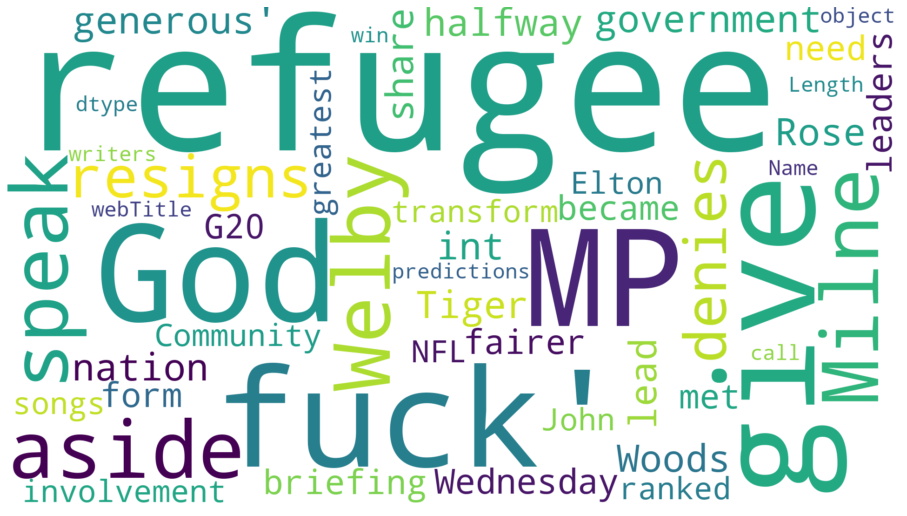

In [48]:
# Define text for sept
mask_title_sept = df_extract_sept.loc[:, 'webTitle'] 
text_sept = str(df_extract_sept.loc[:, 'webTitle'])

# Generate a word cloud image
wordcloud_sept = WordCloud(background_color="white", width=1920, height=1080, min_word_length = 2, collocations=True).generate(text_sept)

# Show 
fig, ax = plt.subplots(figsize = (16,10))
plt.imshow(wordcloud_sept, interpolation="bilinear")
#plt.imshow(wordcloud_sept, interpolation="bilinear")
plt.axis("off")
plt.show()